<font size=6><p style="text-align: center;">Evidence Contrary to the Statistical View of Boosting</p></font>
<font size=3><p style="text-align: center;">Course Project</p></font>


# 1.Should Stumps Be Used for Additive Bayes Decision Rules?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
t1=time.time()
def create_data(j,q,d,n):
    # j:the effective dimentions of data
    # q:bayes error rate
    # d:the total dimention of x
    # n:the number of x
    # return x,y
    X=np.random.uniform(0,1,[n,d])
    sum_j=np.sum(X[:,:j],axis=1)
    p=q+(1-2*q)*(sum_j>j/2)
    Y=np.random.binomial(1,p)
    Y=Y+(1-Y)*(-1)
    return X,Y
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# 1.Should Stumps Be Used for Additive Bayes Decision Rules?
def model(n):
    np.random.seed(n)
    X,Y=create_data(j=5,q=0.1,d=20,n=200)
    test_x,test_y=create_data(j=5,q=0.1,d=20,n=1000)
    clf = AdaBoostClassifier(n_estimators=1000, random_state=0,algorithm='SAMME')#stump
    clf.fit(X, Y) 
    misclassifier_rate=1-np.array(list(clf.staged_score(test_x,test_y)))
    base_estimator=DecisionTreeClassifier(max_leaf_nodes=8)#8 nodes
    clf_2=AdaBoostClassifier(base_estimator=base_estimator,n_estimators=1000, random_state=0,algorithm='SAMME')
    clf_2.fit(X, Y) 
    misclassifier_rate_2=1-np.array(list(clf_2.staged_score(test_x,test_y)))
    return np.array([misclassifier_rate,misclassifier_rate_2])
repeat_n=100
seed=list(np.random.randint(0,10000,[repeat_n]))
import multiprocessing
cores = multiprocessing.cpu_count()
pool = multiprocessing.Pool(processes=10)
result=np.array(pool.map(model,seed))
mis_rate_1=np.mean(result[:,0,:],axis=0)
mis_rate_2=np.mean(result[:,1,:],axis=0)
plt.xlabel('AdaBoost Iterations')
plt.ylabel('Misclassification Error')
plt.plot(mis_rate_1,c='b')
plt.plot(mis_rate_2,c='y')
plt.savefig('image_1.jpg')
print('the time is',time.time()-t1)

the time is 60.75413393974304


# 2.Should Smaller Trees Be Used When the Bayes Error is Larger

the time is 411.70382165908813


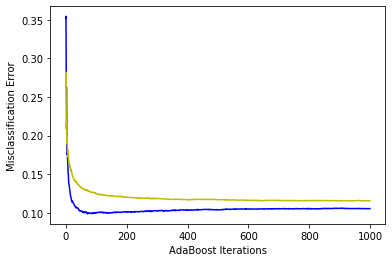

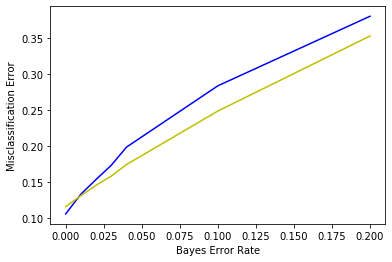

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
t1=time.time()
def create_data(j,q,d,n):
    # j:the effective dimentions of data
    # q:bayes error rate
    # d:the total dimention of x
    # n:the number of x
    # return x,y
    X=np.random.uniform(0,1,[n,d])
    sum_j=np.sum(X[:,:j],axis=1)
    p=q+(1-2*q)*(sum_j>j/2)
    Y=np.random.binomial(1,p)
    Y=Y+(1-Y)*(-1)
    return X,Y
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# 2.Should Smaller Trees Be Used When the Bayes Error is Larger
errorlist_1=[]
errorlist_2=[]
for q in [0,0.01,0.02,0.03,0.04,0.10,0.20]:
    def model(n):
        np.random.seed(n)
        X,Y=create_data(j=5,q=q,d=20,n=200)
        test_x,test_y=create_data(j=5,q=q,d=20,n=1000)
        clf = AdaBoostClassifier(n_estimators=1000, random_state=0,algorithm='SAMME')#stump
        clf.fit(X, Y) 
        misclassifier_rate=1-np.array(list(clf.staged_score(test_x,test_y)))
        base_estimator=DecisionTreeClassifier(max_leaf_nodes=8)#8 nodes
        clf_2=AdaBoostClassifier(base_estimator=base_estimator,n_estimators=1000, random_state=0,algorithm='SAMME')
        clf_2.fit(X, Y) 
        misclassifier_rate_2=1-np.array(list(clf_2.staged_score(test_x,test_y)))
        return np.array([misclassifier_rate,misclassifier_rate_2])
    repeat_n=100
    seed=list(np.random.randint(0,10000,[repeat_n]))
    import multiprocessing
    cores = multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=10)
    result=np.array(pool.map(model,seed))
    mis_rate_1=np.mean(result[:,0,:],axis=0)
    mis_rate_2=np.mean(result[:,1,:],axis=0)
    errorlist_1.append(mis_rate_1[999])
    errorlist_2.append(mis_rate_2[999])
    if q==0:
        plt.xlabel('AdaBoost Iterations')
        plt.ylabel('Misclassification Error')
        plt.plot(mis_rate_1,c='b')
        plt.plot(mis_rate_2,c='y')
        plt.savefig('image_2.jpg')
plt.figure()
plt.xlabel('Bayes Error Rate')
plt.ylabel('Misclassification Error')
plt.plot([0,0.01,0.02,0.03,0.04,0.10,0.20],errorlist_1,c='b')
plt.plot([0,0.01,0.02,0.03,0.04,0.10,0.20],errorlist_2,c='y')
plt.savefig('image_2_1.jpg')
print('the time is',time.time()-t1)

# 3.Should LogitBoost Be Used Instead of AdaBoost for Noisy Data?

the time is 69.01280188560486


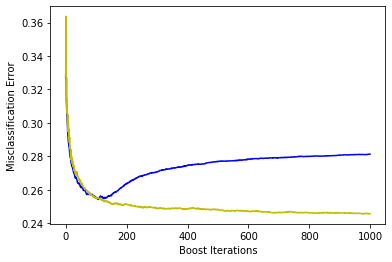

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
t1=time.time()
def create_data(j,q,d,n):
    # j:the effective dimentions of data
    # q:bayes error rate
    # d:the total dimention of x
    # n:the number of x
    # return x,y
    X=np.random.uniform(0,1,[n,d])
    sum_j=np.sum(X[:,:j],axis=1)
    p=q+(1-2*q)*(sum_j>j/2)
    Y=np.random.binomial(1,p)
    Y=Y+(1-Y)*(-1)
    return X,Y
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from logitboost import LogitBoost
# 3.Should LogitBoost Be Used Instead of AdaBoost for Noisy Data?
def model(n):
    np.random.seed(n)
    X,Y=create_data(j=5,q=0.1,d=20,n=200)
    test_x,test_y=create_data(j=5,q=0.1,d=20,n=1000)
    base_estimator_1=DecisionTreeRegressor(max_leaf_nodes=8)
    clf = LogitBoost(base_estimator=base_estimator_1,n_estimators=1000, random_state=0)#stump
    clf.fit(X, Y) 
    misclassifier_rate=1-np.array(list(clf.staged_score(test_x,test_y)))
    base_estimator_2=DecisionTreeClassifier(max_leaf_nodes=8)#8 nodes
    clf_2=AdaBoostClassifier(base_estimator=base_estimator_2,n_estimators=1000, random_state=0,algorithm='SAMME')
    clf_2.fit(X, Y) 
    misclassifier_rate_2=1-np.array(list(clf_2.staged_score(test_x,test_y)))
    return np.array([misclassifier_rate,misclassifier_rate_2])
repeat_n=100
seed=list(np.random.randint(0,10000,[repeat_n]))
import multiprocessing
cores = multiprocessing.cpu_count()
pool = multiprocessing.Pool(processes=10)
result=np.array(pool.map(model,seed))
mis_rate_1=np.mean(result[:,0,:],axis=0)
mis_rate_2=np.mean(result[:,1,:],axis=0)
plt.xlabel('Boost Iterations')
plt.ylabel('Misclassification Error')
plt.plot(mis_rate_1,c='b')
plt.plot(mis_rate_2,c='y')
plt.savefig('image_3.jpg')
print('the time is',time.time()-t1)

# 4.Should Early Stopping Be Used to Prevent Overfitting?

the time is 1882.4128873348236


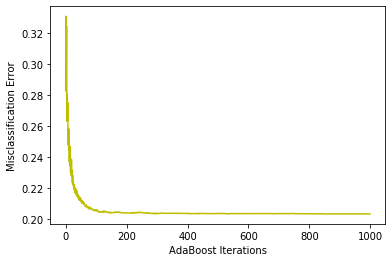

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
t1=time.time()
def create_data(j,q,d,n):
    # j:the effective dimentions of data
    # q:bayes error rate
    # d:the total dimention of x
    # n:the number of x
    # return x,y
    X=np.random.uniform(0,1,[n,d])
    sum_j=np.sum(X[:,:j],axis=1)
    p=q+(1-2*q)*(sum_j>j/2)
    Y=np.random.binomial(1,p)
    Y=Y+(1-Y)*(-1)
    return X,Y
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# 4.Should Early Stopping Be Used to Prevent Overfitting?
def model(n):
    np.random.seed(n)
    X,Y=create_data(j=0,q=0.2,d=20,n=5000)
    test_x,test_y=create_data(j=0,q=0.2,d=20,n=100)
    clf = AdaBoostClassifier(n_estimators=1000, random_state=0,algorithm='SAMME')#stump
    clf.fit(X, Y) 
    misclassifier_rate=1-np.array(list(clf.staged_score(test_x,test_y)))
    base_estimator=DecisionTreeClassifier(max_leaf_nodes=2**8)#8 nodes
    clf_2=AdaBoostClassifier(base_estimator=base_estimator,n_estimators=1000, random_state=0,algorithm='SAMME')
    clf_2.fit(X, Y) 
    misclassifier_rate_2=1-np.array(list(clf_2.staged_score(test_x,test_y)))
    return np.array([misclassifier_rate,misclassifier_rate_2])
repeat_n=100
seed=list(np.random.randint(0,10000,[repeat_n]))
import multiprocessing
cores = multiprocessing.cpu_count()
pool = multiprocessing.Pool(processes=10)
result=np.array(pool.map(model,seed))
mis_rate_1=np.mean(result[:,0,:],axis=0)
mis_rate_2=np.mean(result[:,1,:],axis=0)
plt.xlabel('AdaBoost Iterations')
plt.ylabel('Misclassification Error')
#plt.plot(mis_rate_1,c='b')
plt.plot(mis_rate_2,c='y')
plt.savefig('image_4.jpg')
print('the time is',time.time()-t1)

# 5.Should Regularization Be Based on the Loss Function?

the time is 2.620009660720825


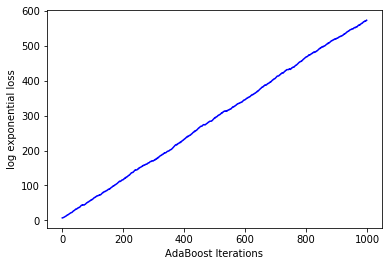

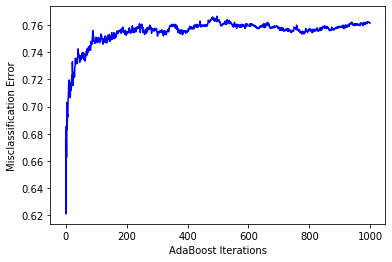

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pdb
t1=time.time()
def create_data(j,q,d,n):
    # j:the effective dimentions of data
    # q:bayes error rate
    # d:the total dimention of x
    # n:the number of x
    # return x,y
    X=np.random.uniform(0,1,[n,d])
    sum_j=np.sum(X[:,:j],axis=1)
    p=q+(1-2*q)*(sum_j>j/2)
    Y=np.random.binomial(1,p)
    Y=Y+(1-Y)*(-1)
    return X,Y
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# 5.Should Regularization Be Based on the Loss Function?
def adaboost(train_x,train_y,test_x,test_y,clf,n_estimator):
    n_train,n_test=len(train_x),len(test_x)
    w=np.ones(n_train)/n_train
    pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)]
    stage_pred_test=np.zeros([n_estimator])
    log_exp_loss=np.zeros([n_estimator])
    for m in range(n_estimator):
        clf.fit(train_x,train_y,sample_weight=w)
        pred_train_i=clf.predict(train_x)
        pred_test_i=clf.predict(test_x)
        error_m=np.sum((pred_train_i!=train_y)*w)
        alpha_m=0.5*np.log((1-error_m)/(error_m+1e-8))
        pred_train+=pred_train_i*alpha_m
        pred_test+=pred_test_i*alpha_m
        w=w*np.exp(-alpha_m*train_y*pred_train_i)
        w=w/np.sum(w)
        stage_pred_test[m]=np.sum((np.sign(pred_test)==test_y))/n_test
        log_exp_loss[m]=np.log(np.sum(np.exp(-test_y*pred_test)))
    return stage_pred_test,log_exp_loss


def model(n):
    np.random.seed(n)
    X,Y=create_data(j=5,q=0.1,d=20,n=200)
    test_x,test_y=create_data(j=5,q=0.1,d=20,n=1000) # test_y:500
    base_estimator=DecisionTreeClassifier(max_leaf_nodes=8)#8 nodes
    
    test_error_rate,log_exp_loss=adaboost(X,Y,test_x,test_y,base_estimator,n_estimator=1000)
    
    return np.array([log_exp_loss,test_error_rate])
repeat_n=2
seed=list(np.random.randint(0,10000,[repeat_n]))
import multiprocessing
cores = multiprocessing.cpu_count()
pool = multiprocessing.Pool(processes=10)
result=np.array(pool.map(model,seed))
loss_list=np.mean(result[:,0,:],axis=0)
mis_rate_2=np.mean(result[:,1,:],axis=0)
plt.xlabel('AdaBoost Iterations')
plt.ylabel('log exponential loss')
plt.plot(loss_list,c='b')
plt.savefig('image_5.jpg')
plt.figure()
plt.xlabel('AdaBoost Iterations')
plt.ylabel('Misclassification Error')
plt.plot(mis_rate_2,c='b')
print('the time is',time.time()-t1)

# 6.Should the Collection of Basis Functions Be Restricted to Prevent Overfitting?

the time is 68.0834231376648


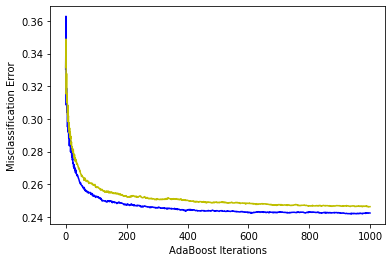

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
t1=time.time()
def create_data(j,q,d,n):
    # j:the effective dimentions of data
    # q:bayes error rate
    # d:the total dimention of x
    # n:the number of x
    # return x,y
    X=np.random.uniform(0,1,[n,d])
    sum_j=np.sum(X[:,:j],axis=1)
    p=q+(1-2*q)*(sum_j>j/2)
    Y=np.random.binomial(1,p)
    Y=Y+(1-Y)*(-1)
    return X,Y
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# 6.Should the Collection of Basis Functions Be Restricted to Prevent Overfitting?
def model(n):
    np.random.seed(n)
    X,Y=create_data(j=5,q=0.1,d=20,n=200)
    test_x,test_y=create_data(j=5,q=0.1,d=20,n=1000)
    base_estimator_1=DecisionTreeClassifier(max_leaf_nodes=8)
    clf = AdaBoostClassifier(base_estimator=base_estimator_1,n_estimators=1000, random_state=0,algorithm='SAMME',)#stump
    clf.fit(X, Y) 
    misclassifier_rate=1-np.array(list(clf.staged_score(test_x,test_y)))
    base_estimator_2=DecisionTreeClassifier(max_leaf_nodes=8,min_samples_leaf=15)#8 nodes
    clf_2=AdaBoostClassifier(base_estimator=base_estimator_2,n_estimators=1000, random_state=0,algorithm='SAMME')
    clf_2.fit(X, Y) 
    misclassifier_rate_2=1-np.array(list(clf_2.staged_score(test_x,test_y)))
    return np.array([misclassifier_rate,misclassifier_rate_2])
repeat_n=100
seed=list(np.random.randint(0,10000,[repeat_n]))
import multiprocessing
cores = multiprocessing.cpu_count()
pool = multiprocessing.Pool(processes=10)
result=np.array(pool.map(model,seed))
mis_rate_1=np.mean(result[:,0,:],axis=0)
mis_rate_2=np.mean(result[:,1,:],axis=0)
plt.xlabel('AdaBoost Iterations')
plt.ylabel('Misclassification Error')
plt.plot(mis_rate_1,c='b')
plt.plot(mis_rate_2,c='y')
plt.savefig('image_6.jpg')
print('the time is',time.time()-t1)

# 7.Should Shrinkage Be Used to Prevent Overfitting?

the time is 54.19340682029724


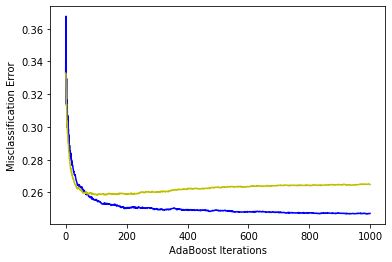

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pdb
t1=time.time()
def create_data(j,q,d,n):
    # j:the effective dimentions of data
    # q:bayes error rate
    # d:the total dimention of x
    # n:the number of x
    # return x,y
    X=np.random.uniform(0,1,[n,d])
    sum_j=np.sum(X[:,:j],axis=1)
    p=q+(1-2*q)*(sum_j>j/2)
    Y=np.random.binomial(1,p)
    Y=Y+(1-Y)*(-1)
    return X,Y
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# 7.Should Shrinkage Be Used to Prevent Overfitting?
def adaboost(train_x,train_y,test_x,test_y,clf,n_estimator,shrinkage):
    n_train,n_test=len(train_x),len(test_x)
    w=np.ones(n_train)/n_train
    pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)]
    stage_pred_test=np.zeros([n_estimator])
    log_exp_loss=np.zeros([n_estimator])
    for m in range(n_estimator):
        clf.fit(train_x,train_y,sample_weight=w)
        pred_train_i=clf.predict(train_x)
        pred_test_i=clf.predict(test_x)
        error_m=np.sum((pred_train_i!=train_y)*w)
        alpha_m=0.5*shrinkage*np.log((1-error_m)/(error_m+1e-8))
        pred_train+=pred_train_i*alpha_m
        pred_test+=pred_test_i*alpha_m
        w=w*np.exp(-alpha_m*train_y*pred_train_i)
        w=w/np.sum(w)
        stage_pred_test[m]=1-np.sum((np.sign(pred_test)==test_y))/n_test
    return stage_pred_test


def model(n):
    np.random.seed(n)
    X,Y=create_data(j=5,q=0.1,d=20,n=200)
    test_x,test_y=create_data(j=5,q=0.1,d=20,n=1000) # test_y:500
    base_estimator=DecisionTreeClassifier(max_leaf_nodes=8)#8 nodes
    
    test_error_rate_1=adaboost(X,Y,test_x,test_y,base_estimator,n_estimator=1000,shrinkage=1)
    test_error_rate_2=adaboost(X,Y,test_x,test_y,base_estimator,n_estimator=1000,shrinkage=0.1)
    return np.array([test_error_rate_1,test_error_rate_2])
repeat_n=100
seed=list(np.random.randint(0,10000,[repeat_n]))
import multiprocessing
cores = multiprocessing.cpu_count()
pool = multiprocessing.Pool(processes=10)
result=np.array(pool.map(model,seed))
mis_rate_1=np.mean(result[:,0,:],axis=0)
mis_rate_2=np.mean(result[:,1,:],axis=0)
plt.xlabel('AdaBoost Iterations')
plt.ylabel('Misclassification Error')
plt.plot(mis_rate_1,c='b')
plt.plot(mis_rate_2,c='y')
plt.savefig('image_7.jpg')
print('the time is',time.time()-t1)

# 8.Is Boosting Estimating Probabilities?

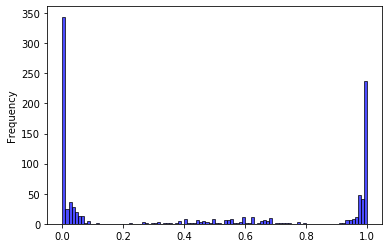

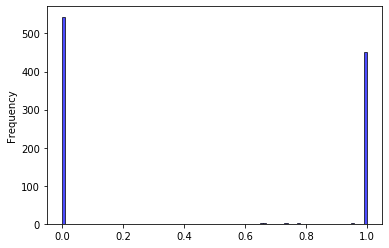

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pdb
t1=time.time()
def create_data(j,q,d,n):
    # j:the effective dimentions of data
    # q:bayes error rate
    # d:the total dimention of x
    # n:the number of x
    # return x,y
    X=np.random.uniform(0,1,[n,d])
    sum_j=np.sum(X[:,:j],axis=1)
    p=q+(1-2*q)*(sum_j>j/2)
    Y=np.random.binomial(1,p)
    Y=Y+(1-Y)*(-1)
    return X,Y
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# 8.Is Boosting Estimating Probabilities?
def adaboost(train_x,train_y,test_x,test_y,clf,n_estimator,shrinkage):
    n_train,n_test=len(train_x),len(test_x)
    w=np.ones(n_train)/n_train
    pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)]
    stage_pred_test=np.zeros([n_estimator])
    log_exp_loss=np.zeros([n_estimator])
    for m in range(n_estimator):
        clf.fit(train_x,train_y,sample_weight=w)
        pred_train_i=clf.predict(train_x)
        pred_test_i=clf.predict(test_x)
        error_m=np.sum((pred_train_i!=train_y)*w)
        alpha_m=0.5*shrinkage*np.log((1-error_m)/(error_m+1e-8))
        pred_train+=pred_train_i*alpha_m
        pred_test+=pred_test_i*alpha_m
        w=w*np.exp(-alpha_m*train_y*pred_train_i)
        w=w/np.sum(w)
        stage_pred_test[m]=1-np.sum((np.sign(pred_test)==test_y))/n_test
    prob=1/(1+np.exp(np.clip(-2*pred_test,-500,500)))
    return stage_pred_test,prob


def model(n):
    np.random.seed(n)
    X,Y=create_data(j=5,q=0.1,d=20,n=200)
    test_x,test_y=create_data(j=5,q=0.1,d=20,n=1000) # test_y:500
    base_estimator=DecisionTreeClassifier(max_leaf_nodes=8)#8 nodes
    
    test_error_rate,prob_10_iter=adaboost(X,Y,test_x,test_y,base_estimator,n_estimator=10,shrinkage=1)
    test_error_rate,prob_1000_iter=adaboost(X,Y,test_x,test_y,base_estimator,n_estimator=1000,shrinkage=1)
    return np.array([prob_10_iter,prob_1000_iter])
repeat_n=1
seed=list(np.random.randint(0,10000,[repeat_n]))
import multiprocessing
cores = multiprocessing.cpu_count()
pool = multiprocessing.Pool(processes=10)
result=np.array(pool.map(model,seed))
prob_10_iter=result[0,0,:]
prob_1000_iter=result[0,1,:]

plt.ylabel('Frequency')
plt.hist(prob_10_iter, bins=100, facecolor="blue", edgecolor="black", alpha=0.7)
plt.savefig('image_8_1.jpg')
plt.figure()
plt.ylabel('Frequency')
plt.hist(prob_1000_iter, bins=100, facecolor="blue", edgecolor="black", alpha=0.7)
plt.savefig('image_8_2.jpg')

# 9.Is Boosting Similar to the One Nearest Neighbor Classifier?

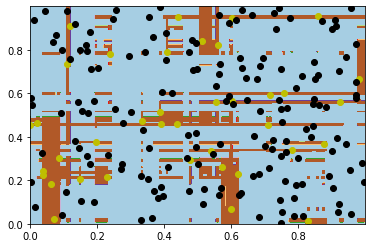

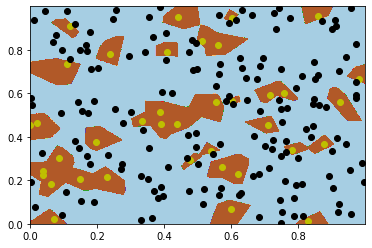

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time
t1=time.time()
def create_data(j,q,d,n):
    # j:the effective dimentions of data
    # q:bayes error rate
    # d:the total dimention of x
    # n:the number of x
    # return x,y
    X=np.random.uniform(0,1,[n,d])
    sum_j=np.sum(X[:,:j],axis=1)
    p=q+(1-2*q)*(sum_j>j/2)
    Y=np.random.binomial(1,p)
    Y=Y+(1-Y)*(-1)
    return X,Y
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
X,Y=create_data(j=0,q=0.2,d=2,n=200)
test_x,test_y=create_data(j=0,q=0.2,d=2,n=1000)
base_estimator=DecisionTreeClassifier(max_leaf_nodes=8)#8 nodes
clf=AdaBoostClassifier(base_estimator=base_estimator,n_estimators=1000, random_state=0,algorithm='SAMME')
clf.fit(X, Y) 
plt.figure()

#plot population result
xx, yy = np.meshgrid(np.arange(0, 1, 0.001),
                     np.arange(0, 1, 0.001))
z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
z=z.reshape(xx.shape)#colors=['yellow','blue']
cs = plt.contourf(xx, yy, z+1, cmap=plt.cm.Paired)
plt.axis("tight")

#plot the training points
idx=np.where(Y==1) 
plt.scatter(X[idx,0],X[idx,1],c='y')  #label=1
idx=np.where(Y==-1) 
plt.scatter(X[idx,0],X[idx,1],c='k')  #label=1
plt.savefig('image_9_1.jpg')


from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, Y) 
plt.figure()

#plot population result
xx, yy = np.meshgrid(np.arange(0, 1, 0.001),
                     np.arange(0, 1, 0.001))
z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
z=z.reshape(xx.shape)#colors=['yellow','blue']
cs = plt.contourf(xx, yy, z+1, cmap=plt.cm.Paired)
plt.axis("tight")

#plot the training points
idx=np.where(Y==1) 
plt.scatter(X[idx,0],X[idx,1],c='y')  #label=1
idx=np.where(Y==-1) 
plt.scatter(X[idx,0],X[idx,1],c='k')  #label=1
plt.savefig('image_9_2.jpg')

# 10.Is Boosting Consistent?

the time is 399.99922490119934


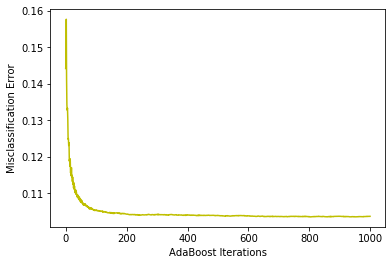

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time
t1=time.time()
def create_data(j,q,d,n):
    # j:the effective dimentions of data
    # q:bayes error rate
    # d:the total dimention of x
    # n:the number of x
    # return x,y
    X=np.random.uniform(0,1,[n,d])
    sum_j=np.sum(X[:,:j],axis=1)
    p=q+(1-2*q)*(sum_j>j/2)
    Y=np.random.binomial(1,p)
    Y=Y+(1-Y)*(-1)
    return X,Y
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# 10.Is Boosting Consistent?
def model(n):
    np.random.seed(n)
    X,Y=create_data(j=1,q=0.1,d=5,n=5000)
    test_x,test_y=create_data(j=1,q=0.1,d=5,n=1000)
    base_estimator=DecisionTreeClassifier(max_leaf_nodes=2**8)#8 nodes
    clf_2=AdaBoostClassifier(base_estimator=base_estimator,n_estimators=1000, random_state=0,algorithm='SAMME')
    clf_2.fit(X, Y) 
    misclassifier_rate_2=1-np.array(list(clf_2.staged_score(test_x,test_y)))
    return np.array([misclassifier_rate_2])
repeat_n=100
seed=list(np.random.randint(0,10000,[repeat_n]))
import multiprocessing
cores = multiprocessing.cpu_count()
pool = multiprocessing.Pool(processes=10)
result=np.array(pool.map(model,seed))
mis_rate_2=np.mean(result[:,0,:],axis=0)
plt.xlabel('AdaBoost Iterations')
plt.ylabel('Misclassification Error')
plt.plot(mis_rate_2,c='y')
plt.savefig('image_10.jpg')
print('the time is',time.time()-t1)